In [2]:
from langchain.schema import HumanMessage,SystemMessage
import os
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [3]:
load_dotenv()
open_ai_Key = os.getenv("OPENAI_API_KEY")

In [4]:
llm_name = "gpt-3.5-turbo"
model = ChatOpenAI(model=llm_name, api_key=open_ai_Key)

In [35]:
messages = [
    SystemMessage(
        content="You are a helpful assistant who is extremely competent as a Computer Scientist! Your name is Rob."
    ),
    HumanMessage(
        content="who was the very first computer scientist?"
    )
]

In [36]:
res = model.invoke(messages)
type(res)
print(res.content)

The very first computer scientist is often credited to be Ada Lovelace, who was an English mathematician and writer in the mid-19th century. She is known for her work on Charles Babbage's early mechanical general-purpose computer, the Analytical Engine. Ada Lovelace is considered the world's first computer programmer, as she created the first algorithm intended to be carried out by a machine.


In [6]:
def fagent(messages):
    return model.invoke(messages)

In [7]:
def run_agent():
    while True:
        user_input = input("You:")
        if user_input.lower() == 'exit':
            print('bye')
            break
        print("AI Agent is thinking...")
        messages = [HumanMessage(content=user_input)]
        res = fagent(messages)
        print("AI Agent: getting the response...")
        print(f"AI agent:{res.content}")
        exit()


In [55]:
import pandas as pd
from langchain_experimental.agents.agent_toolkits import (create_pandas_dataframe_agent, create_csv_agent)

In [56]:
load_dotenv()
open_ai_Key = os.getenv("OPENAI_API_KEY")

llm = "gpt-3.5-turbo"
model = ChatOpenAI(api_key=open_ai_Key, model=llm)

In [10]:
agent = create_pandas_dataframe_agent?

Signature:
create_pandas_dataframe_agent(
    llm: langchain_core.runnables.base.Runnable[typing.Union[langchain_core.prompt_values.PromptValue, str, collections.abc.Sequence[typing.Union[langchain_core.messages.base.BaseMessage, list[str], tuple[str, str], str, dict[str, typing.Any]]]], typing.Union[langchain_core.messages.base.BaseMessage, str]],
    df: Any,
    agent_type: Union[langchain.agents.agent_types.AgentType, Literal['openai-tools', 'tool-calling']] = <AgentType.ZERO_SHOT_REACT_DESCRIPTION: 'zero-shot-react-description'>,
    callback_manager: Optional[langchain_core.callbacks.base.BaseCallbackManager] = None,
    prefix: Optional[str] = None,
    suffix: Optional[str] = None,
    input_variables: Optional[List[str]] = None,
    verbose: bool = False,
    return_intermediate_steps: bool = False,
    max_iterations: Optional[int] = 15,
    max_execution_time: Optional[float] = None,
    early_stopping_method: str = 'force',
    agent_executor_kwargs: Optional[Dict[str, Any]

In [57]:
import pandas as pd

df = pd.read_csv(r"C:\Users\somashekar.inguva\OneDrive - Telstra\Documents\GenAI_Projects\database-ai-agents\data\salaries_2023.csv").fillna(value=0)
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [25]:
pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
agent = create_pandas_dataframe_agent(
    llm=model,
    df=df,
    verbose=True,allow_dangerous_code=True
)

In [60]:
# res = agent.invoke("how many rows are there in the dataframe")
res = agent.invoke("Which grade has the highest average base salary, and compare the average female pay vs male pay? give only output, dont include Action Input and other in the result")
res["output"]



> Entering new AgentExecutor chain...
Final Answer: Grade M2 has the highest average base salary. The average female pay is $100,451.23 and the average male pay is $110,878.00.

> Finished chain.


'Grade M2 has the highest average base salary. The average female pay is $100,451.23 and the average male pay is $110,878.00.'

In [32]:
res = agent.invoke("what are the highest paid base salaries")
res["output"]



> Entering new AgentExecutor chain...
Thought: To find the highest paid base salaries, we need to sort the dataframe based on the `Base_Salary` column in descending order and then select the top values.
Action: python_repl_ast
Action Input: df.sort_values('Base_Salary', ascending=False)['Base_Salary'].head()821     292000.00
502     258000.00
8509    258000.00
579     246162.47
1677    246000.00
Name: Base_Salary, dtype: float64The highest paid base salaries are 292000.00, 258000.00, 258000.00, 246162.47, and 246000.00.
Final Answer: 292000.00, 258000.00, 258000.00, 246162.47, 246000.00

> Finished chain.


'292000.00, 258000.00, 258000.00, 246162.47, 246000.00'

In [34]:
res = agent.invoke("what are the distinct Divisions")
res["output"]



> Entering new AgentExecutor chain...
Thought: To find the distinct Divisions, I can use the unique() method on the 'Division' column of the dataframe.

Action: python_repl_ast
Action Input: df['Division'].unique()['ABS 85 Administration' 'ABS 85 Administrative Services'
 'ABS 85 Beer Delivery Operations' 'ABS 85 Beer Loading'
 'ABS 85 Beer Warehouse Operations'
 'ABS 85 Licensure, Regulation and Education'
 'ABS 85 Liquor and Wine Delivery Operations'
 'ABS 85 Wholesale Operations' 'ABS 85 Burtonsville' 'ABS 85 Cabin John'
 'ABS 85 Clarksburg Village' 'ABS 85 Cloverly' 'ABS 85 Darnestown'
 'ABS 85 Director' 'ABS 85 Fallsgrove' "ABS 85 Director's Office"
 'ABS 85 Downtown Rockville' 'ABS 85 Flower Avenue'
 'ABS 85 Gaithersburg Square' 'ABS 85 Goshen Crossing'
 'ABS 85 Hampden Lane' 'ABS 85 IT Administration' 'ABS 85 Kensington'
 'ABS 85 King Farm' 'ABS 85 Kingsview' 'ABS 85 Leisure World'
 'ABS 85 Liquor and WIne Loading' 'ABS 85 Montrose' 'ABS 85 Muddy Branch'
 'ABS 85 Olney' 'ABS 8

'The distinct Divisions in the dataframe are the ones listed above.'

## SelfNOtes:
## Question:
Why for some agents "tools=" option cant be found.. ex: create_pandas_dataframe_agent
but for some i can see we are passing this way..
agent = create_tool_calling_agent(llm=llm,tools=tools, prompt=prompt)
## Ans:
Great question! The difference you're observing is due to **how different agents in LangChain are architected**. LangChain has several agent constructors, and each one supports different customization options depending on the **type of agent**, its **tool system**, and its **intended use case**.

---

### 🔍 Key Difference: **Tool-Based Agents vs. Built-in Specialized Agents**

#### 1. ✅ `create_tool_calling_agent(...)`

* **Flexible / General-purpose agent**
* You **explicitly pass tools** to it via `tools=tools`
* You also customize the `prompt`, memory, etc.
* Built using LangChain’s **tool-calling framework** (`OpenAI Functions`, `ToolExecutor`, etc.)

**Use case**: When you're building a custom agent that uses multiple tools like calculators, APIs, vector stores, databases, etc.

```python
agent = create_tool_calling_agent(llm=llm, tools=tools, prompt=prompt)
```

---

#### 2. ⚙️ `create_pandas_dataframe_agent(...)`

* A **specialized helper function** provided by LangChain
* Internally builds an agent with the **Python REPL tool + Pandas utilities**
* It doesn’t expose the `tools=` parameter because the tools are automatically generated from your `df`

```python
agent = create_pandas_dataframe_agent(llm=llm, df=df, allow_dangerous_code=True)
```

> Internally, it wraps tools like `PythonAstREPLTool` so you don't have to configure them manually.

---

### 🧠 Summary

| Function                                  | Accepts `tools=`? | Purpose                                |
| ----------------------------------------- | ----------------- | -------------------------------------- |
| `create_tool_calling_agent`               | ✅ Yes             | Custom agents using arbitrary tools    |
| `create_pandas_dataframe_agent`           | ❌ No              | Specialized agent for Pandas DataFrame |
| `create_csv_agent`                        | ❌ No              | Specialized agent for CSVs             |
| `initialize_agent`                        | ✅ Yes             | General-purpose agent setup            |
| `AgentExecutor.from_agent_and_tools(...)` | ✅ Yes             | Low-level agent creation               |

---

### ✅ When to Use What?

* Use **`create_tool_calling_agent`** if you're manually building tools and want full control.
* Use **`create_pandas_dataframe_agent`** if you want a quick way to analyze a DataFrame and are okay with defaults.
* If you want to **customize tools** (e.g. add charting, summarization, or database access), build your agent using `initialize_agent()` or `create_tool_calling_agent()`.

Would you like to see how to replicate `create_pandas_dataframe_agent` using your own custom `tools=` setup?


In [43]:
print(type(llm))

<class 'langchain_community.chat_models.openai.ChatOpenAI'>


In [54]:
from langchain.tools import tool
# from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI
from langchain.agents import create_tool_calling_agent, AgentExecutor
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.schema.messages import SystemMessage
# from langchain.memory import ConversationBufferMemory

# Define tool
@tool
def square(x: int) -> int:
    """Return the square of a number."""
    return x * x

tools = [square]

# Correct LLM
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)  # ✅ Must be ChatOpenAI

# Prompt with correct structure
prompt = ChatPromptTemplate.from_messages([
    SystemMessage(content="You are a helpful assistant."),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human", "{input}"),
    MessagesPlaceholder(variable_name="agent_scratchpad"),
])

# memory = ConversationBufferMemory(return_messages=True)

# Agent and executor
agent = create_tool_calling_agent(llm=llm, tools=tools, prompt=prompt)
executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Run the agent
response = executor.invoke({
    "input": "What is the square of 125?",
    "chat_history": []  # ✅ Must be included
})
print(response["output"])




> Entering new AgentExecutor chain...

Invoking: `square` with `{'x': 125}`


15625The square of 125 is 15625.

> Finished chain.
The square of 125 is 15625.


## SQL Agent

In [65]:
from sqlalchemy import create_engine
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv
load_dotenv()
openai_key = os.getenv("OPENAI_API_KEY")

llm_name = "gpt-3.5-turbo"
model = ChatOpenAI(api_key=openai_key, model=llm_name)

In [66]:
df = pd.read_csv(r"C:\Users\somashekar.inguva\OneDrive - Telstra\Documents\GenAI_Projects\database-ai-agents\data\salaries_2023.csv").fillna(value=0)

In [68]:
database_file_path = "./db/salary.db"

In [70]:
engine = create_engine(f"sqlite:///{database_file_path}")
os.makedirs(os.path.dirname(database_file_path), exist_ok=True)

In [71]:
df.to_sql("salaries_2023",con=engine,if_exists="replace",index=False)

10291

In [72]:
from langchain.agents import create_sql_agent
from langchain_community.agent_toolkits.sql.toolkit import SQLDatabaseToolkit
from langchain_community.utilities import SQLDatabase

In [73]:
db = SQLDatabase.from_uri(f"sqlite:///{database_file_path}")
toolkit = SQLDatabaseToolkit(db=db, llm=model)

In [74]:
sql_agent = create_sql_agent?

Signature:
create_sql_agent(
    llm: 'BaseLanguageModel',
    toolkit: 'Optional[SQLDatabaseToolkit]' = None,
    agent_type: "Optional[Union[AgentType, Literal['openai-tools', 'tool-calling']]]" = None,
    callback_manager: 'Optional[BaseCallbackManager]' = None,
    prefix: 'Optional[str]' = None,
    suffix: 'Optional[str]' = None,
    format_instructions: 'Optional[str]' = None,
    input_variables: 'Optional[List[str]]' = None,
    top_k: 'int' = 10,
    max_iterations: 'Optional[int]' = 15,
    max_execution_time: 'Optional[float]' = None,
    early_stopping_method: 'str' = 'force',
    verbose: 'bool' = False,
    agent_executor_kwargs: 'Optional[Dict[str, Any]]' = None,
    extra_tools: 'Sequence[BaseTool]' = (),
    *,
    db: 'Optional[SQLDatabase]' = None,
    prompt: 'Optional[BasePromptTemplate]' = None,
    **kwargs: 'Any',
) -> 'AgentExecutor'
Docstring:
Construct a SQL agent from an LLM and toolkit or database.

Args:
    llm: Language model to use for the agent. If a

In [75]:
sql_agent = create_sql_agent(llm=model,toolkit=toolkit,verbose=True)
sql_agent.invoke("how may records does the table have")



> Entering new SQL Agent Executor chain...
Action: sql_db_list_tables
Action Input: salaries_2023I can query the number of records in the salaries_2023 table.
Action: sql_db_schema
Action Input: salaries_2023
CREATE TABLE salaries_2023 (
	"Department" TEXT, 
	"Department_Name" TEXT, 
	"Division" TEXT, 
	"Gender" TEXT, 
	"Base_Salary" FLOAT, 
	"Overtime_Pay" FLOAT, 
	"Longevity_Pay" FLOAT, 
	"Grade" TEXT
)

/*
3 rows from salaries_2023 table:
Department	Department_Name	Division	Gender	Base_Salary	Overtime_Pay	Longevity_Pay	Grade
ABS	Alcohol Beverage Services	ABS 85 Administration	M	175873.0	0.0	0.0	M2
ABS	Alcohol Beverage Services	ABS 85 Administration	M	145613.36	0.0	0.0	M3
ABS	Alcohol Beverage Services	ABS 85 Administration	F	136970.0	0.0	0.0	M3
*/I can count the number of records in the salaries_2023 table using a SQL query.
Action: sql_db_query
Action Input: SELECT COUNT(*) FROM salaries_2023[(10291,)]I now know the final answer
Final Answer: The table salaries_2023 has 10,291 rec

{'input': 'how may records does the table have',
 'output': 'The table salaries_2023 has 10,291 records.'}

In [77]:
sql_agent.invoke("what is the highest average salary by department, and give me the number?")["output"]



> Entering new SQL Agent Executor chain...
Action: sql_db_list_tables
Action Input: salaries_2023I should query the schema of the `salaries_2023` table to see what columns are available for me to use in my query.
Action: sql_db_schema
Action Input: salaries_2023
CREATE TABLE salaries_2023 (
	"Department" TEXT, 
	"Department_Name" TEXT, 
	"Division" TEXT, 
	"Gender" TEXT, 
	"Base_Salary" FLOAT, 
	"Overtime_Pay" FLOAT, 
	"Longevity_Pay" FLOAT, 
	"Grade" TEXT
)

/*
3 rows from salaries_2023 table:
Department	Department_Name	Division	Gender	Base_Salary	Overtime_Pay	Longevity_Pay	Grade
ABS	Alcohol Beverage Services	ABS 85 Administration	M	175873.0	0.0	0.0	M2
ABS	Alcohol Beverage Services	ABS 85 Administration	M	145613.36	0.0	0.0	M3
ABS	Alcohol Beverage Services	ABS 85 Administration	F	136970.0	0.0	0.0	M3
*/I will need to calculate the average salary by department and then find the highest one. I will use the `Base_Salary` column for this calculation.
Action: sql_db_query
Action Input: SEL

'$165,196.75'

## Function calling

In [82]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
import json
from openai import OpenAI

# Load environment variables from .env file
load_dotenv()

openai_key = os.getenv("OPENAI_API_KEY")

llm_name = "gpt-3.5-turbo"  # use this cause is cheaper!
model = ChatOpenAI(api_key=openai_key, model=llm_name)

# for the weather function calling
client = OpenAI(api_key=openai_key)


# Example dummy function hard coded to return the same weather
# In production, this could be your backend API or an external API
def get_current_weather(location, unit="fahrenheit"):
    """Get the current weather in a given location"""
    if "tokyo" in location.lower():
        return json.dumps({"location": "Tokyo", "temperature": "10", "unit": unit})
    elif "san francisco" in location.lower():
        return json.dumps(
            {"location": "San Francisco", "temperature": "72", "unit": unit}
        )
    elif "paris" in location.lower():
        return json.dumps({"location": "Paris", "temperature": "22", "unit": unit})
    else:
        return json.dumps({"location": location, "temperature": "unknown"})


def run_conversation():
    # Step 1: send the conversation and available functions to the model
    messages = [
        {
            "role": "user",
            "content": "What's the weather like in San Francisco, Tokyo, and Paris?",
        }
    ]

    # Define the available functions
    tools = [
        {
            "type": "function",
            "function": {
                "name": "get_current_weather",
                "description": "Get the current weather in a given location",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "location": {
                            "type": "string",
                            "description": "The city and state, e.g. San Francisco, CA",
                        },
                        "unit": {"type": "string", "enum": ["celsius", "fahrenheit"]},
                    },
                    "required": ["location"],
                },
            },
        }
    ]
    # Call the model with the conversation and available functions
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=messages,
        tools=tools,
        tool_choice="auto",  # auto is default, but we'll be explicit
    )
    response_message = response.choices[0].message
    print(response_message.model_dump_json(indent=2))
    print("tool calls: ", response_message.tool_calls)

In [83]:
run_conversation()

{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": [],
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "call_3pcO7WoWke93VDoJbJLybzXF",
      "function": {
        "arguments": "{\"location\": \"San Francisco, CA\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    },
    {
      "id": "call_oMeqAi1nTkxX3J4qdukzTjeR",
      "function": {
        "arguments": "{\"location\": \"Tokyo, Japan\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    },
    {
      "id": "call_N8SU5KBZBGZTJPFdg4zLyyZt",
      "function": {
        "arguments": "{\"location\": \"Paris, France\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    }
  ]
}
tool calls:  [ChatCompletionMessageToolCall(id='call_3pcO7WoWke93VDoJbJLybzXF', function=Function(arguments='{"location": "San Francisco, CA"}', name='get_current_weather'), type='function'), ChatCompletionMessageToolCall(id

In [84]:
def run_conversation():
    # Step 1: send the conversation and available functions to the model
    messages = [
        {
            "role": "user",
            "content": "What's the weather like in San Francisco, Tokyo, and Paris?",
        }
    ]

    # Define the available functions
    tools = [
        {
            "type": "function",
            "function": {
                "name": "get_current_weather",
                "description": "Get the current weather in a given location",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "location": {
                            "type": "string",
                            "description": "The city and state, e.g. San Francisco, CA",
                        },
                        "unit": {"type": "string", "enum": ["celsius", "fahrenheit"]},
                    },
                    "required": ["location"],
                },
            },
        }
    ]
    # Call the model with the conversation and available functions
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=messages,
        tools=tools,
        tool_choice="auto",  # auto is default, but we'll be explicit
    )
    response_message = response.choices[0].message
    print(response_message.model_dump_json(indent=2))
    print("tool calls: ", response_message.tool_calls)

    tool_calls = response_message.tool_calls
    # Step 2: check if the model wanted to call a function
    if tool_calls:
        # Step 3: call the function
        # Note: the JSON response may not always be valid; be sure to handle errors
        available_functions = {
            "get_current_weather": get_current_weather,
        }  # only one function in this example, but you can have multiple
        messages.append(response_message)  # extend conversation with assistant's reply
        # Step 4: send the info for each function call and function response to the model
        for tool_call in tool_calls:
            function_name = tool_call.function.name
            function_to_call = available_functions[function_name]
            function_args = json.loads(tool_call.function.arguments)
            function_response = function_to_call(
                location=function_args.get("location"),
                unit=function_args.get("unit"),
            )
            messages.append(
                {
                    "tool_call_id": tool_call.id,
                    "role": "tool",
                    "name": function_name,
                    "content": function_response,
                }
            )  # extend conversation with function response
        second_response = client.chat.completions.create(
            model="gpt-4o",
            messages=messages,
        )  # get a new response from the model where it can see the function response
        return second_response

In [85]:
print(run_conversation().model_dump_json(indent=2))

{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": [],
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "call_JBK4scUT6enh8wzJe7n9JOCL",
      "function": {
        "arguments": "{\"location\": \"San Francisco, CA\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    },
    {
      "id": "call_MXqe2b6oUILZlhnsh7smbmDW",
      "function": {
        "arguments": "{\"location\": \"Tokyo, Japan\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    },
    {
      "id": "call_tE3RzY2dReQn2DNOSAYhY9W1",
      "function": {
        "arguments": "{\"location\": \"Paris, France\"}",
        "name": "get_current_weather"
      },
      "type": "function"
    }
  ]
}
tool calls:  [ChatCompletionMessageToolCall(id='call_JBK4scUT6enh8wzJe7n9JOCL', function=Function(arguments='{"location": "San Francisco, CA"}', name='get_current_weather'), type='function'), ChatCompletionMessageToolCall(id

## Selfnotes:
📘 Flowchart of Weather Tool Call with OpenAI
sql
Copy
Edit

START
  ↓
📦 Load environment variables (.env)  
  ↓  
🔐 Get OpenAI API key from env  
  ↓  
🤖 Initialize model (LangChain + OpenAI)  
  ↓  
🌤️ Define a fake function: get_current_weather(location, unit)
  ↓  
🧑 User asks: "What's the weather like in Tokyo, SF, and Paris?"
  ↓  
🧠 Send question + function definition to GPT-4o (OpenAI API)  
  ↓  
🛠️ GPT may decide to call the weather function(s)  
  ↓  
✅ If GPT requested tool call(s):  
   🔁 For each tool call:
       - Parse arguments
       - Run the Python function
       - Add result to the message list  
  ↓  
🔄 Re-send conversation with tool responses to GPT-4o  
  ↓  
📤 GPT gives a final, informed response  
  ↓  
🖨️ Print final result


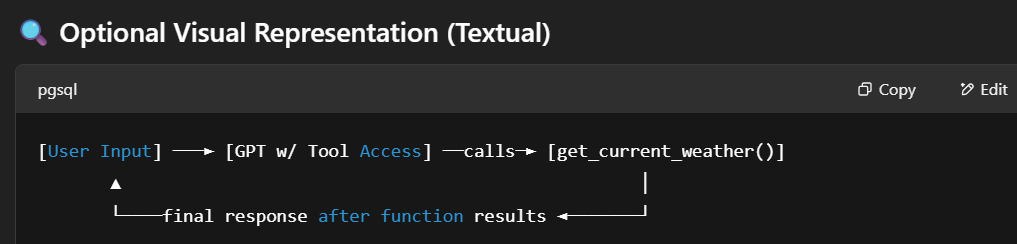

In [3]:
import json
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
import pandas as pd

from sqlalchemy import create_engine
import numpy as np
from sqlalchemy import text
from openai import OpenAI

import helpers
from helpers import (
    get_avg_salary_and_female_count_for_division,
    get_total_overtime_pay_for_department,
    get_total_longevity_pay_for_grade,
    get_employee_count_by_gender_in_department,
    get_employees_with_overtime_above,
)


# Load environment variables from .env file
load_dotenv()

openai_key = os.getenv("OPENAI_API_KEY")


llm_name = "gpt-3.5-turbo"
model = ChatOpenAI(api_key=openai_key, model=llm_name)

# for the weather function calling
client = OpenAI(api_key=openai_key)

from langchain.agents import create_sql_agent
from langchain_community.agent_toolkits.sql.toolkit import SQLDatabaseToolkit
from langchain_community.utilities import SQLDatabase

# create a db from csv file

# Path to your SQLite database file
database_file_path = "./db/salary.db"


# Create an engine to connect to the SQLite database
# SQLite only requires the path to the database file
engine = create_engine(f"sqlite:///{database_file_path}")
file_url = "./data/salaries_2023.csv"
os.makedirs(os.path.dirname(database_file_path), exist_ok=True)
df = pd.read_csv(file_url).fillna(value=0)
df.to_sql("salaries_2023", con=engine, if_exists="replace", index=False)


def run_conversation(
    query="""What is the average salary and the count of female employees
    #                   in the ABS 85 Administrative Services division?""",
):

    messages = [
        # {
        #     "role": "user",
        #     "content": """What is the average salary and the count of female employees
        #               in the ABS 85 Administrative Services division?""",
        # },
        {
            "role": "user",
            "content": query,
        },
        # {
        #     "role": "user", # gives error request too large
        #     "content": """How many employees have overtime pay above 5000?""",
        # },
    ]

    # Call the model with the conversation and available functions
    response = client.chat.completions.create(
        model=llm_name,
        messages=messages,
        tools=helpers.tools_sql,
        tool_choice="auto",  # auto is default, but we'll be explicit
    )
    response_message = response.choices[0].message
    return response_message

In [5]:
response_message = run_conversation()
print(response_message.model_dump_json(indent=2))
print("tool calls: ", response_message.tool_calls)

{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": [],
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "call_dsDi0rMdQvW8qecAaQwvD454",
      "function": {
        "arguments": "{\"division_name\":\"ABS 85 Administrative Services\"}",
        "name": "get_avg_salary_and_female_count_for_division"
      },
      "type": "function"
    }
  ]
}
tool calls:  [ChatCompletionMessageToolCall(id='call_dsDi0rMdQvW8qecAaQwvD454', function=Function(arguments='{"division_name":"ABS 85 Administrative Services"}', name='get_avg_salary_and_female_count_for_division'), type='function')]


In [6]:
tool_calls = response_message.tool_calls
print(tool_calls)

[ChatCompletionMessageToolCall(id='call_dsDi0rMdQvW8qecAaQwvD454', function=Function(arguments='{"division_name":"ABS 85 Administrative Services"}', name='get_avg_salary_and_female_count_for_division'), type='function')]


In [7]:
type(tool_calls)

list

In [13]:
for tool_call in tool_calls:
            function_name = tool_call.function.name
            print(function_name)

get_avg_salary_and_female_count_for_division


In [14]:
for tool_call in tool_calls:
            args = tool_call.function.arguments
            print(args)

{"division_name":"ABS 85 Administrative Services"}


## Self Notes

Question: Are Assistants and agents same in GenAI context ?

Answer:
Excellent question — the terms **"assistants"** and **"agents"** are often used interchangeably in generative AI, but **they are not exactly the same**. Here's a clear comparison to help you understand the distinction:

---

### ⚙️ **1. Assistant (General-Purpose Chatbot)**

* **Definition**: A **static**, general-purpose conversational interface that answers questions or performs tasks.
* **Examples**: ChatGPT, Bing Chat, Bard.
* **Behavior**:

  * Responds to prompts.
  * Doesn’t have long-term memory (unless explicitly built).
  * Doesn’t plan or reason across steps unless instructed to.

✅ **Use case**:

> "What’s the capital of France?"
> Assistant: "Paris."

---

### 🤖 **2. Agent (Autonomous Problem Solver)**

* **Definition**: An **autonomous system** that can **plan, reason, and act** over multiple steps using tools, APIs, or functions.
* **Key Traits**:

  * Has goals and can decide how to reach them.
  * May use **tools/functions**, memory, and **looping** (retry, replan).
  * Can chain thoughts (like “think → act → observe → repeat”).

✅ **Use case**:

> "Find me the cheapest flight to Tokyo and book it."
> Agent might:

1. Call a flight search tool,
2. Parse results,
3. Choose one,
4. Call a booking function,
5. Return confirmation.

---

### 🔄 Quick Comparison Table

| Feature          | Assistant                   | Agent                                  |
| ---------------- | --------------------------- | -------------------------------------- |
| 🔄 Interactivity | Single or short turn        | Multi-step reasoning & action          |
| 🧠 Reasoning     | Responds directly to prompt | Plans, reasons, and adapts dynamically |
| 🛠️ Tool Use     | Optional, often limited     | Central to agent behavior              |
| 🔁 Autonomy      | Low (reactive)              | High (goal-driven and proactive)       |
| 🧩 Examples      | ChatGPT, Claude, Siri       | LangChain agent, AutoGPT, ReAct agents |

---

### ✅ TL;DR

* **Assistant** = Smart responder.
* **Agent** = Autonomous doer.

Let me know if you want code examples or want to build your own simple agent!


In [15]:
pip install streamlit

     ---------------------------------------- 9.9/9.9 MB 7.7 MB/s eta 0:00:00
  Using cached altair-5.5.0-py3-none-any.whl (731 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl (79 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl (207 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
  Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.2-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
